In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import pandas as pd

import vendee_globe as vg

In [3]:
# load and prep race data 
data_folder = "data_2024"
vg.update_data(data_folder)
df_race = vg.load_race_data(data_folder)
df_race = vg.data_prep_race(df_race, skipper_corrections=[('Kojiro Shiraishi', 'Kōjirō Shiraishi')])
df_race.shape

no new data


(4357, 24)

In [4]:
# load and prep web data
if os.path.exists("web_2024.parquet"):
    df_web = pd.read_parquet("web_2024.parquet")
else:
    df_web = load_web_data_2024()
    df_web.to_parquet("web_2024.parquet")

df_web = vg.data_prep_web(df_web, skipper_corrections=[('Kojiro Shiraishi', 'Kōjirō Shiraishi')])
df_web.shape

(40, 17)

In [5]:
# load and prep wiki data 
if os.path.exists("wiki_2024.parquet"):
    df_wiki = pd.read_parquet("wiki_2024.parquet")
else:
    df_wiki = vg.load_wiki_data_2024()
    df_wiki.to_parquet("wiki_2024.parquet")

df_wiki.shape

(40, 11)

In [6]:
# merge all 3 dataframes
df = pd.merge(df_race, df_web, on="skipper", how="left")
df = pd.merge(df, df_wiki, on="skipper", how="left")
df.shape

(4357, 50)

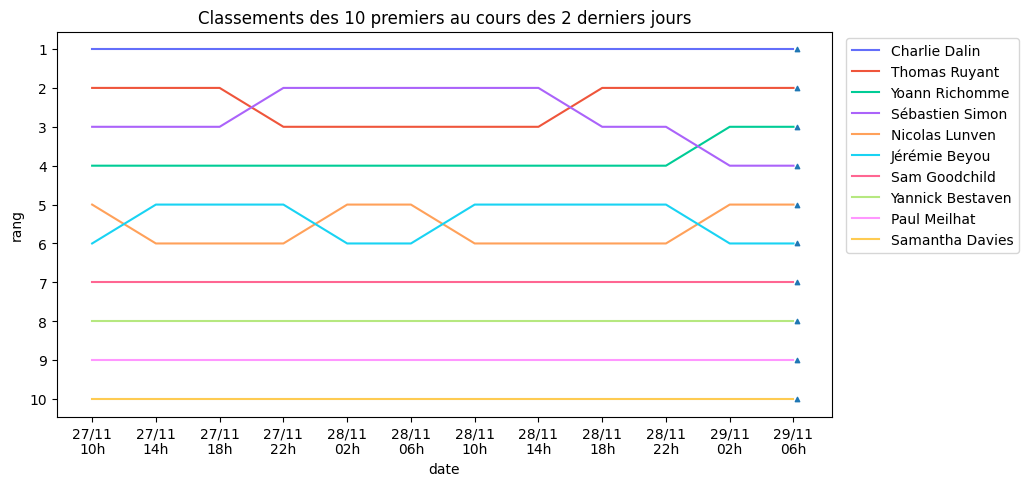

In [7]:
vg.show_ranking(df)

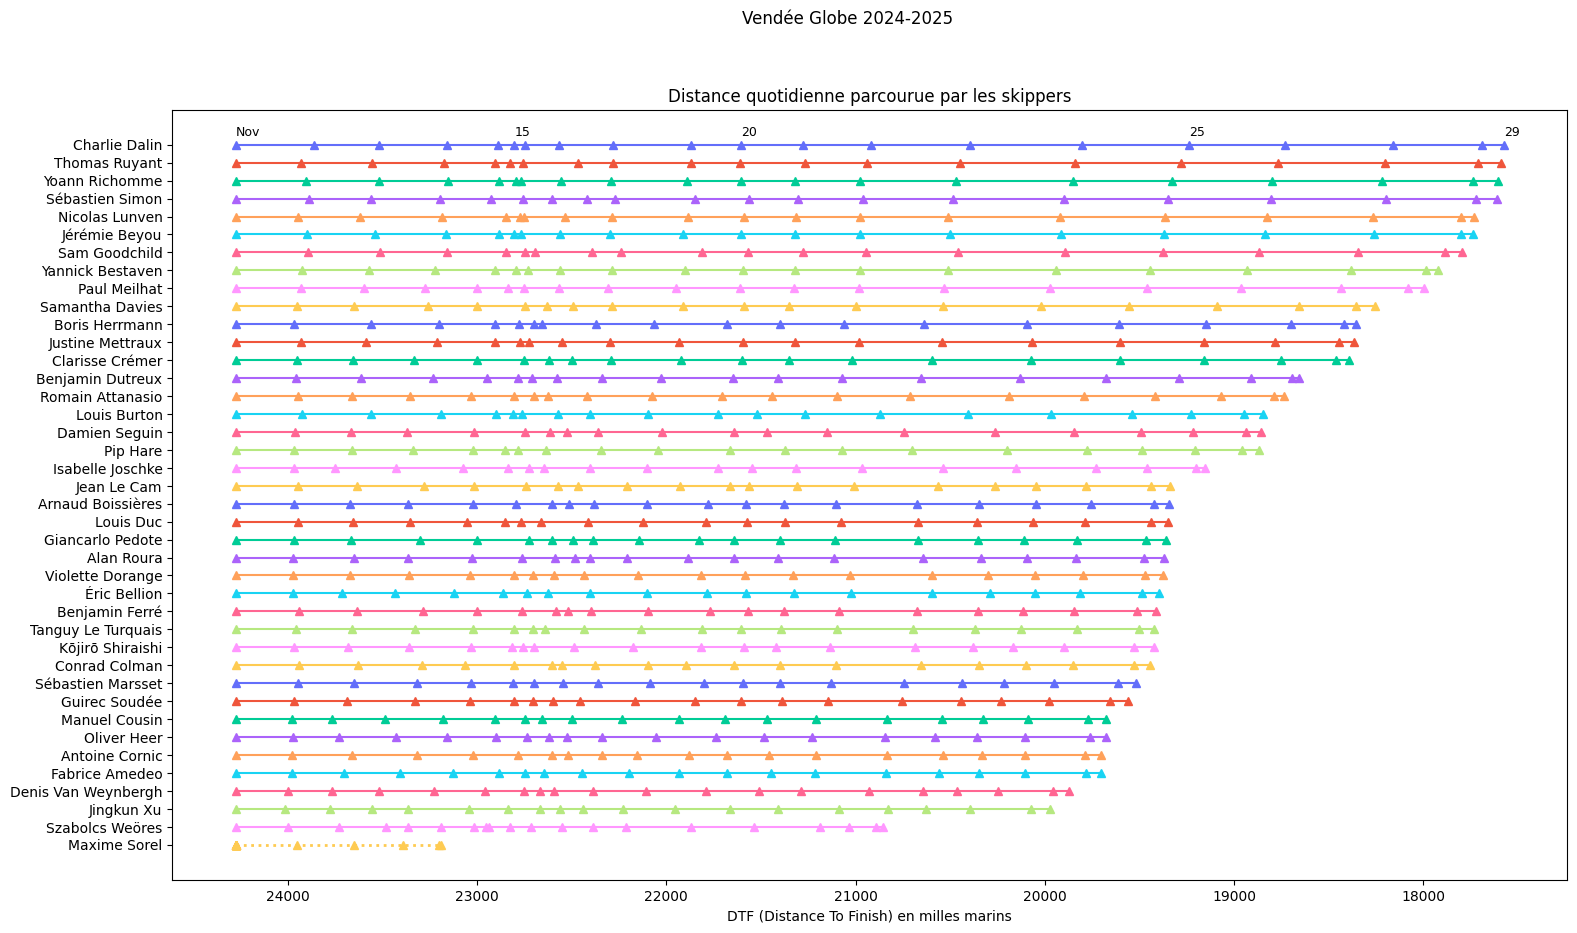

In [8]:
vg.show_race(df_race)

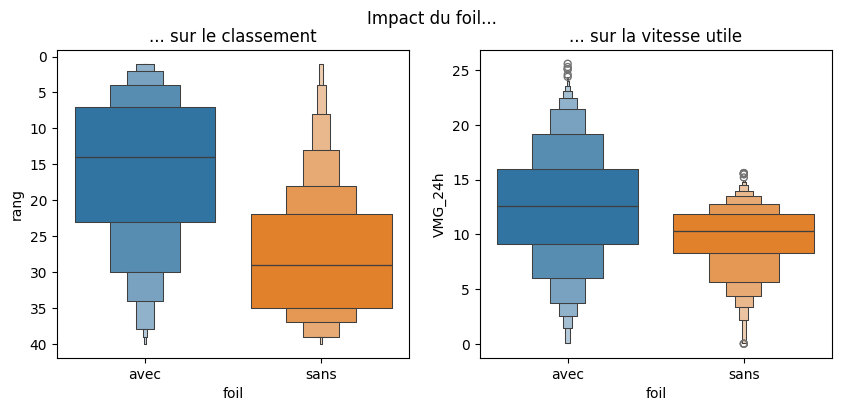

In [9]:
vg.impact_foil(df)

In [10]:
vg.interact(df)

interactive(children=(Dropdown(description='Colonne :', index=13, options=('rang', 'latitude', 'longitude', 'c…

In [11]:
vg.show_globe(df_race, 0, 10)

In [12]:
vg.show_speed(df_race)

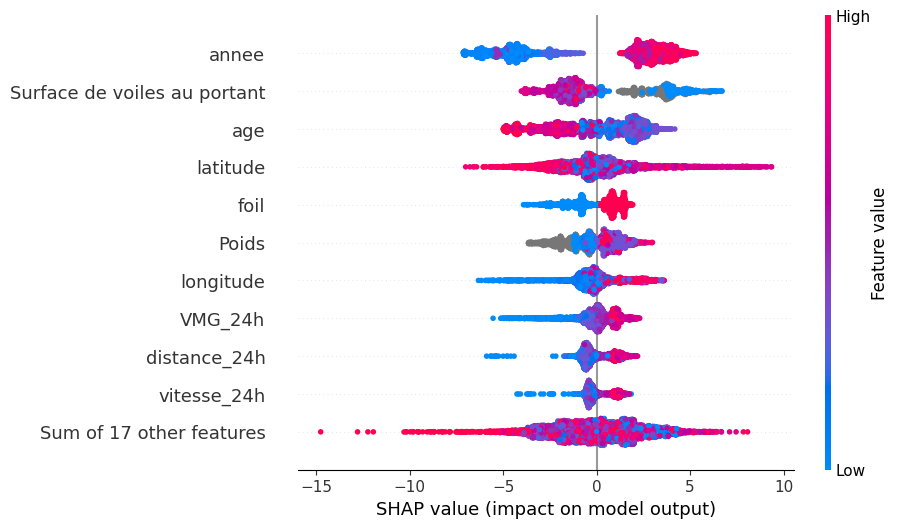

In [13]:
vg.show_shap_values(df)